In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
df1=pd.read_csv("movies.csv")
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# What is the shape of "movies.csv"?

In [5]:
df1.shape

(9742, 3)

# What is the shape of "rating.csv"?


In [6]:
df.shape


(100836, 4)

# How many unique "userId" are available in "ratings.csv"?

In [7]:
df["userId"].nunique()

610

# Which movie has recieved maximum number of user ratings?

In [8]:
df.groupby(by="movieId")["rating"].count().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [9]:
df1[df1['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [10]:
df3=pd.read_csv("tags.csv")
df3

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [11]:
matrix_movie_id =df1[df1["title"] == "Matrix, The (1999)"]["movieId"].values[0]
matrix_tags =df3[df3["movieId"] == matrix_movie_id]
print(matrix_tags["tag"].tolist())

['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [12]:
terminator_movie_id =df1[(df1["title"] == "Terminator 2: Judgment Day (1991)")]["movieId"].values[0]


In [13]:
terminator_ratings =df[df["movieId"] == terminator_movie_id]


In [14]:
average_rating = terminator_ratings["rating"].mean()

In [15]:
average_rating

3.970982142857143

# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
fight_club_movie_id =df1[(df1["title"] == "Fight Club (1999)")]["movieId"].values[0]

In [18]:
fight_club_movie_id 

2959

In [19]:
fight_club_ratings = df[df["movieId"] == fight_club_movie_id]

In [20]:
fight_club_ratings

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874
...,...,...,...,...
95893,601,2959,5.0,1441639461
96788,603,2959,4.0,963176105
97835,606,2959,5.0,1171231517
99107,608,2959,5.0,1117336631


(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

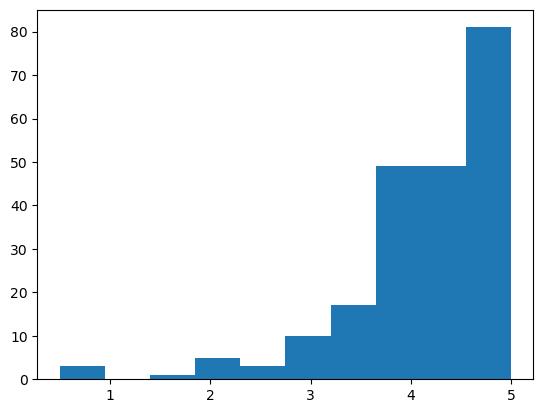

In [21]:
plt.hist(fight_club_ratings["rating"], bins=10)

In [22]:
grouped_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [23]:
grouped_ratings

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [24]:
merged_df = pd.merge(df1, grouped_ratings, on='movieId', how='inner')

In [25]:
merged_df1= pd.merge(df1,df, on='movieId', how='inner')

In [26]:
merged_df1

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [27]:
f_movies = merged_df[merged_df['count'] > 50]
f_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


# Which movie is the most popular based on  average user ratings?

In [28]:
movies_to_compare = ['Godfather, The (1972)', 'Shawshank Redemption, The (1994)','Jumanji (1995)', 'Wolf of Wall Street, The (2013)']
filtered_df = merged_df1[merged_df1['title'].isin(movies_to_compare)]

In [29]:
filtered_df 

,movieId,title,genres,userId,rating,timestamp
215,2,Jumanji (1995),Adventure|Children|Fantasy,6,4.0,845553522
216,2,Jumanji (1995),Adventure|Children|Fantasy,8,4.0,839463806
217,2,Jumanji (1995),Adventure|Children|Fantasy,18,3.0,1455617462
218,2,Jumanji (1995),Adventure|Children|Fantasy,19,3.0,965704331
219,2,Jumanji (1995),Adventure|Children|Fantasy,20,3.0,1054038313
...,...,...,...,...,...,...
96418,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,560,4.0,1469648763
96419,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,564,3.0,1478453646
96420,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,599,3.0,1498528478
96421,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,601,4.5,1521397833


In [30]:
average_ratings = filtered_df.groupby('title')['rating'].mean()
sorted_ratings = average_ratings.sort_values(ascending=False)
print(sorted_ratings.index[0])

Shawshank Redemption, The (1994)


# Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [31]:
ratings_count = merged_df1.groupby("title")["rating"].count()
top_5_movies = ratings_count.nlargest(5).index
print(top_5_movies)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object', name='title')


# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [32]:
scifi_movies = merged_df1[merged_df1['genres'].str.contains('Sci-Fi')]
rating_counts = scifi_movies.groupby('title')['rating'].count()
sorted_rating_counts = rating_counts.sort_values(ascending=False)
third_most_popular_scifi = sorted_rating_counts.index[2]
print("Third most popular Sci-Fi movie based on user ratings:")
print(third_most_popular_scifi)

Third most popular Sci-Fi movie based on user ratings:
Jurassic Park (1993)


In [33]:
df4=pd.read_csv("links.csv")
df4

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


# Mention the movieId of the movie which has the highest IMDB rating.

In [34]:
import requests
import numpy as np
import bs4

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan


In [35]:
scrapper(114709)

'8.3'

In [36]:
merged_df3=pd.merge(df1,df4,on='movieId',how="inner")

In [37]:
merged_df3

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [38]:
merged_df4=pd.merge(merged_df3,df,on='movieId',how="inner")

In [39]:
merged_df4

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0,184,3.5,1537109545
100833,193585,Flint (2017),Drama,6397426,479308.0,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0,184,3.5,1537110021


In [48]:
fliter_movies=merged_df4['rating'].count()>50

In [44]:
l=[]
for i in merged_df3['imdbId'][:5]:
    l.append(scrapper(i))

In [45]:
l

['8.3', '7.1', '6.6', '6.0', '6.1']

In [51]:
movie_highest_rating = merged_df1.loc[merged_df1['rating'] == merged_df1['rating'].max()]
movieId_highest_rating = movie_highest_rating['movieId'].iloc[0]
movieId_highest_rating

1

# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.


In [220]:
scifi_movies = merged_df1[merged_df1['genres'].str.contains('Sci-Fi')]
scifi_highest_rating = scifi_movies.loc[scifi_movies['rating'] == scifi_movies['rating'].max()]
scifi_highest_rating = scifi_movie_with_highest_rating['movieId'].iloc[0]
scifi_highest_rating

24